In [1]:
%pylab nbagg
from tvb.simulator.lab import *
import pandas as pd
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
#depressed brain 
Q_health = np.repeat(1, 76)
oscilator = models.WilsonCowan(Q = Q_health)

In [3]:
white_matter = connectivity.Connectivity.from_file()
white_matter.speed = numpy.array([3.0])

WARNING  File 'hemispheres' not found in ZIP.


In [4]:
white_matter_coupling = coupling.Linear(a=numpy.array([0.0039]))

In [5]:
#Initialise some Monitors with period in physical time
mon_raw = monitors.Raw(period = 0.9765625)
mon_tavg = monitors.TemporalAverage(period=1)

#Bundle them
what_to_watch = (mon_raw, mon_tavg)

In [6]:
#important variables of dataset
sample_period = 0.0009765625 #seconds         
sf = 1/sample_period #sampling frequency 
sample_rate = 1024

#sns.set(font_scale=1.2)
dt = 0.01

In [7]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)


Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


1
check1
check2


<IPython.core.display.Javascript object>


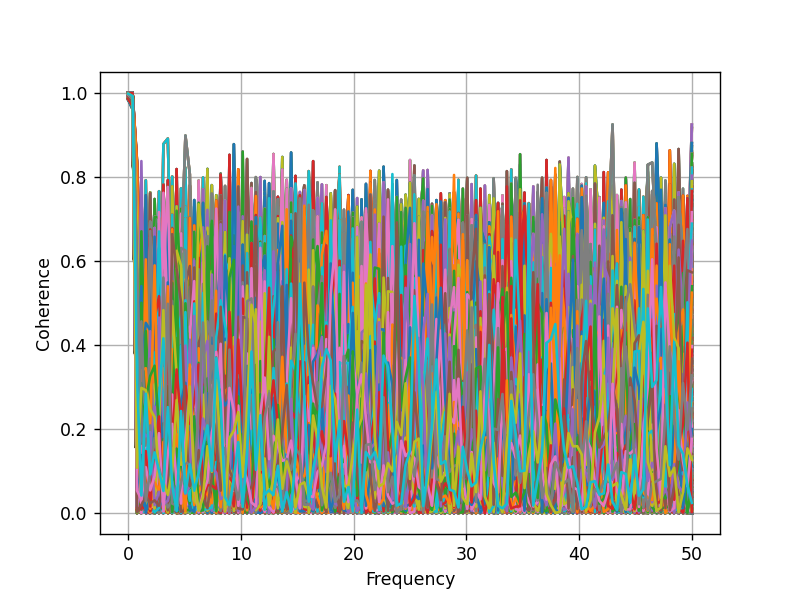

2
check1
check2
3
check1
check2
4
check1
check2
5
check1
check2
6
check1
check2
7
check1
check2
8
check1
check2
9
check1
check2
10
check1
check2
11
check1
check2
12
check1
check2
13
check1
check2
14
check1
check2
15
check1
check2
16
check1
check2
17
check1
check2
18
check1
check2
19
check1
check2
20
check1
check2
21
check1
check2
22
check1
check2
23
check1
check2
24
check1
check2
25
check1
check2
26
check1
check2
27
check1
check2
28
check1
check2
29
check1
check2
30
check1
check2
31
check1
check2
32
check1
check2
33
check1
check2
34
check1
check2
35
check1
check2
36
check1
check2
37
check1
check2
38
check1
check2
39
check1
check2
40
check1
check2
41
check1
check2
42
check1
check2
43
check1
check2
44
check1
check2
45
check1
check2
46
check1
check2
47
check1
check2
48
check1
check2
49
check1
check2
50
check1
check2
51
check1
check2
52
check1
check2
53
check1
check2
54
check1
check2
55
check1
check2
56
check1
check2
57
check1
check2
58
check1
check2
59
check1
check2
60
check1
check2
61
ch

In [8]:
#loop  start om 19u10
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs/Subbands"

c1 = np.repeat("", 1)
c2 = np.repeat("",1)

ROI_base = numpy.zeros(shape=(1,2))
ROI_ar = np.column_stack([c1, c2, ROI_base])
ROI_tot= np.column_stack([c1, c2, ROI_base])


varkeep_8 = {}
varkeep_9 = {}
varkeep_10 = {}
varkeep_11= {}
varkeep_alfa= {}

indices = [7,  13, 15, 16, 17,18, 19, 20, 21, 30, 31, 33,35, 36, 45, 51, 53, 54, 55, 56, 57, 58, 59, 68, 69, 71 , 73,74]
counter = 0
loop = 1

NS_arr = np.arange(0,26, 0.25)

nsubs = 101
for i in range(nsubs):
    if i == 0:
        pass 
    else:
        value = 10**-6
        print(loop)
        
        NS = NS_arr[i] 
        
        #create simulator 
        sim = simulator.Simulator(model = oscilator, connectivity = white_matter,
                          coupling = white_matter_coupling, 
                          integrator = integrators.EulerStochastic(dt=0.01220703125, noise=noise.Additive(noise_seed = int(NS), nsig=numpy.array([value]))),
                        monitors =  what_to_watch)

        sim.configure()

        print("check1")
        
        #Perform the simulation
        tavg_data = []
        tavg_time = []

        for raw, tavg in sim(simulation_length=2500):
    
            if not tavg is None:
                tavg_time.append(tavg[0])
                tavg_data.append(tavg[1])
    
        #Make the lists numpy.arrays for easier use.
        RAW = numpy.array(tavg_data)
        RAW_real = RAW[:, 0, :, 0]
        raw_time = tavg_time
        
        print("check2")
        
        counter = 0
        for ROI1 in indices:
            for ROI2 in indices:
                if ROI1 == ROI2:
                    pass
                elif ROI1 > ROI2:
                    pass
                else:
                    x = RAW_real[:,ROI1]
                    y = RAW_real[:,ROI2]
                    
                    #delete the first 500ms
                    list_deleterows = [*range(0,500,1)]
                    x = np.delete(x, list_deleterows, 0)
                    y =  np.delete(y, list_deleterows, 0)
                    
                    cxy, f = cohere(x, y, 256, 1. / dt)
                    cxy_8, f_8 = cxy[21:24], f[21:24] #band 8-9Hz
                    cxy_9, f_9 = cxy[24:26], f[24:26] # 9-10Hz
                    cxy_10, f_10 = cxy[26:29], f[26:29] #10-11Hz
                    cxy_11, f11 = cxy[29:32], f[29:32] #11-12Hz
                    cxy_alfa, f_alfa = cxy[21:32], f[21:32] #8-12Hz

                    
                    #make matrix of coherence measures
                    coh_8 = cxy_8
                    coh_9 = cxy_9
                    coh_10 = cxy_10
                    coh_11= cxy_11
                    coh_alfa= cxy_alfa
                        
                    if counter == 0:
                        coh_tot_8 = coh_8
                        coh_tot_9 = coh_9
                        coh_tot_10 = coh_10
                        coh_tot_11= coh_11
                        coh_tot_alfa = coh_alfa
                        
                        if loop == 1:
                            ROI_tot[0][0] = str(regions[ROI1])
                            ROI_tot[0][1] = str(regions[ROI2])
                            ROI_tot[0][2] = ROI1
                            ROI_tot[0][3] = ROI2
            

                    else:
                        tuplex = (coh_tot_8, coh_8)
                        coh_tot_8 = np.vstack(tuplex)
                        
                        tuplex = (coh_tot_9, coh_9)
                        coh_tot_9 = np.vstack(tuplex)
                        
                        tuplex = (coh_tot_10, coh_10)
                        coh_tot_10 = np.vstack(tuplex)
                        
                        tuplex = (coh_tot_11, coh_11)
                        coh_tot_11 = np.vstack(tuplex)
                        
                        
                        tuplex = (coh_tot_alfa, coh_alfa)
                        coh_tot_alfa = np.vstack(tuplex)
                        
                        if loop == 1:
                            ROI_ar[0][0] = str(regions[ROI1])
                            ROI_ar[0][1] = str(regions[ROI2])
                            ROI_ar[0][2] = ROI1
                            ROI_ar[0][3] = ROI2
                            tupleROI = (ROI_tot, ROI_ar)
                            ROI_tot = np.vstack(tupleROI)
                        
                    counter = counter + 1            
                    
                    
        #load in depressed brains 
        varkeep_8["data" + str(i)] = coh_tot_8
        varkeep_9["data" + str(i)] = coh_tot_9
        varkeep_10["data" + str(i)] = coh_tot_10
        varkeep_11["data" + str(i)] = coh_tot_11
        varkeep_alfa["data" + str(i)] = coh_tot_alfa
        
        loop = loop + 1
        
print('prepare to stack')
#hstack all arrays to get all coherences corresponding to one ROI pair from all the 100 brains in one row

#coherence 8_9Hz
namelist = []
for i in range(nsubs):
    if i == 0:
        pass
    else:
        name = varkeep_8["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array_8 = np.hstack(nametup)
        
file_name = mydir + "/Health_coh_total_hstacked_8" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_8)
h5f.close()

#coherence 9_10Hz
namelist = []
for i in range(nsubs):
    if i == 0:
        pass
    else:
        name = varkeep_9["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array_9 = np.hstack(nametup)
        
file_name = mydir + "/Health_coh_total_hstacked_9" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_9)
h5f.close()

#coherence 10-11Hz
namelist = []
for i in range(nsubs):
    if i == 0:
        pass
    else:
        name = varkeep_10["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array_10 = np.hstack(nametup)
        
file_name = mydir + "/Health_coh_total_hstacked_10" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_10)
h5f.close()

#coherence 11-12Hz
namelist = []
for i in range(nsubs):
    if i == 0:
        pass
    else:
        name = varkeep_11["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array_11 = np.hstack(nametup)
        
file_name = mydir + "/Health_coh_total_hstacked_11" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_11)
h5f.close()

#coherence 8-12
namelist = []
for i in range(nsubs):
    if i == 0:
        pass
    else:
        name = varkeep_alfa["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array_alfa = np.hstack(nametup)
        
file_name = mydir + "/Health_coh_total_hstacked_alfa" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_alfa)
h5f.close()


#store order of pairs 

file_name = mydir + "/Health_ROI_order.csv"
outcome = pd.DataFrame.from_records(ROI_tot)
outcome.columns = ["ROI1", "ROI2", "ROI1_nr", "ROI2_nr"]
outcome.to_csv(path_or_buf = file_name, index = False)

#delete first 500points of time array and save it
list_deleterows = [*range(0,500,1)]
raw_time = np.delete(raw_time, list_deleterows, 0)
        
file_name = mydir + "/Time_Health.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('time', data=raw_time)
h5f.close()


f_array  = f[21:32]
file_name = mydir + "/Frequencies.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=f_array)
h5f.close()

In [ ]:
array = np.hstack(nametup)

In [ ]:
print(shape(array))

In [ ]:
print(array)

In [ ]:
x = mean(array[0]) #geeft gemiddelde van eerste rij = dus gemiddeld van eerste ROI paar